## Introduction

We aim to accomplist the following for this study:

1) Build a prediction model that will perform the following:

    a) Classify if a customer is going to churn or not
    b) Preferably and based on model performance, choose a model that will attach a probability to the churn to make it 
       easier for customer service to target low hanging fruits in their efforts to prevent churn

In [1]:
## import tool
import numpy as np
import csv
import pandas as pd
import random as r
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## np calcuate mean and std
from numpy import mean
from numpy import std

## train and test split
from sklearn.model_selection import train_test_split 
### evaluating the Model
from sklearn import metrics 

##impurt model
from sklearn.linear_model import LogisticRegression #LogisticRegression
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Boosted tree
from sklearn.neighbors import KNeighborsClassifier #KNN

##scoring function
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import plot_confusion_matrix #plot confusion matrix
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import precision_score #precision_score
from sklearn.metrics import roc_auc_score #roc/auc score
from sklearn.metrics import roc_curve #ROC curve
from sklearn.model_selection import GridSearchCV #find best parameters

In [2]:
# load raw data
## Customer: customer_id
## Credit score of the customer: credit_core
## country of residence: country
## gender: male/female
## age
## tenure: how long the customer has been a customer
## balance: average balance on credit card
## number of bank's projects the customer uses: products_number
## if customer has a bank credit card : credit_card -> 1/0
## if an active member(transaction in last 30 days): active_member -> 1/0
## est.salary of the customer: estimated_salary
## if the client has left the bank during some period: churn -> 1/0

path = r'C:/Users/jessi/OneDrive/Desktop/ALY6020/Final/bank_churn.csv'
customerdf= pd.read_csv(path,delimiter = ';')
customerdf.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#checking amount of rows in given dataset to know the size 
len(customerdf)

10000

## Data Explore

In [4]:
#checking type of every attribution in the dataset
customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
customer_id         10000 non-null int64
credit_score        10000 non-null int64
country             10000 non-null object
gender              10000 non-null object
age                 10000 non-null int64
tenure              10000 non-null int64
balance             10000 non-null float64
products_number     10000 non-null int64
credit_card         10000 non-null int64
active_member       10000 non-null int64
estimated_salary    10000 non-null float64
churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
#Removing null values if it exist
customerdf.dropna(inplace = True)

In [6]:
#Summarize each attribution 
customerdf.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


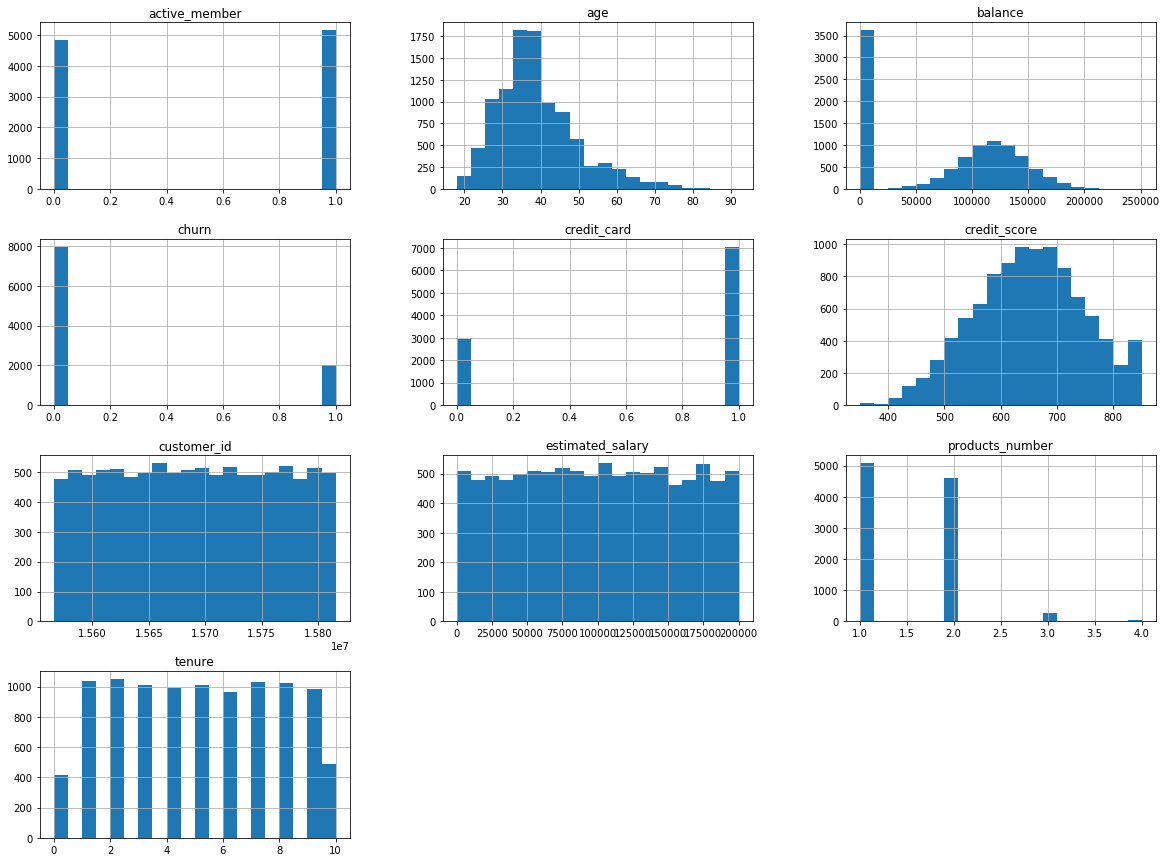

In [7]:
#creating plots on dataset
#Each attribution Histagram w/o data processing
customerdf.hist(bins=20,figsize=(20,15))
plt.show()

In [8]:
#explore churn account
customerdf["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

So there are 20.37% of customers left the bank, and 79.63% of customers not left the bank.

In [9]:
#cumstomer analysis by country and churn
customerdf.groupby(['country','churn']).customer_id.agg(['count'])

count
country churn       
France  0       4204
        1        810
Germany 0       1695
        1        814
Spain   0       2064
        1        413

In [10]:
#customer analysis by gender and churn
customerdf.groupby(['gender','churn']).customer_id.agg(['count'])

count
gender churn       
Female 0       3404
       1       1139
Male   0       4559
       1        898

In [11]:
#customer analysis by own credit_card and churn
customerdf.groupby(['credit_card','churn']).customer_id.agg(['count'])

count
credit_card churn       
0           0       2332
            1        613
1           0       5631
            1       1424

In [12]:
#customer analysis by active member and churn
customerdf.groupby(['active_member','churn']).customer_id.agg(['count'])

count
active_member churn       
0             0       3547
              1       1302
1             0       4416
              1        735

In [13]:
#customer analysis by products and churn
customerdf.groupby(['churn','products_number']).customer_id.agg(['count'])

count
churn products_number       
0     1                 3675
      2                 4242
      3                   46
1     1                 1409
      2                  348
      3                  220
      4                   60

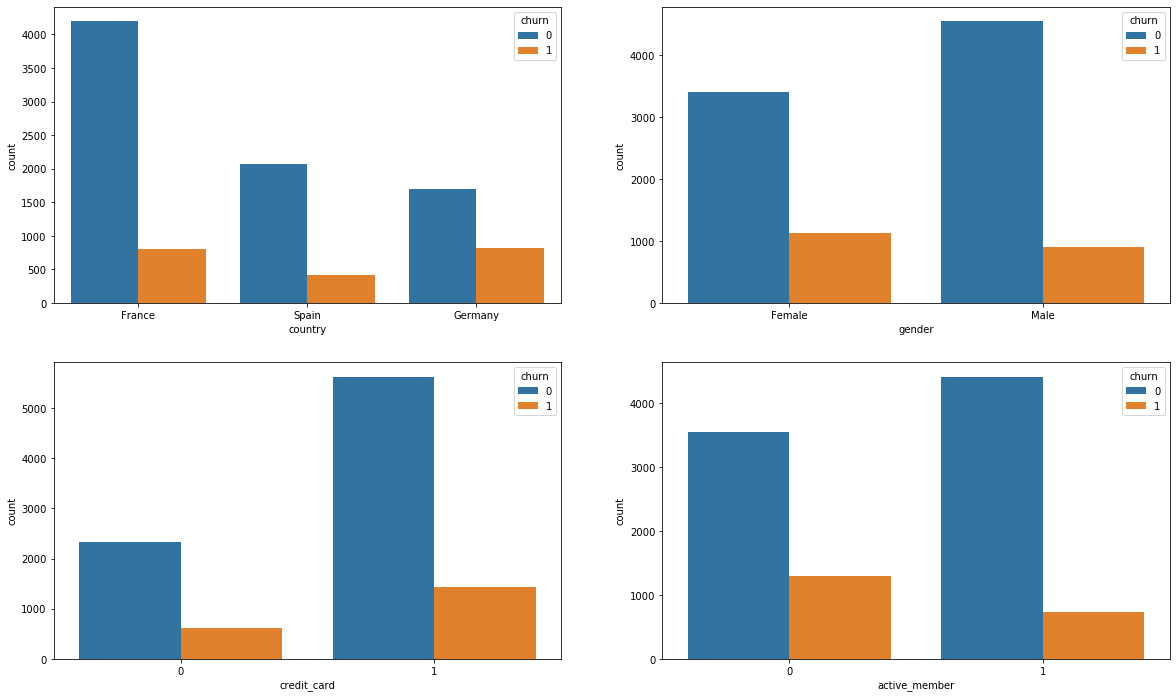

In [14]:
#Bar chart shows the customer analysis
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
data = customerdf
sns.countplot(x='country', hue = 'churn', data=data, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn', data=data, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn', data=data, ax=axarr[1][0])
sns.countplot(x='active_member', hue = 'churn', data=data, ax=axarr[1][1])

In this data, half of the samples collected from France, and another half of the data from Spain and Germany.
Most of the customers (70%) have credit cards.
Inactive member accounts left the bank more than active member accounts.

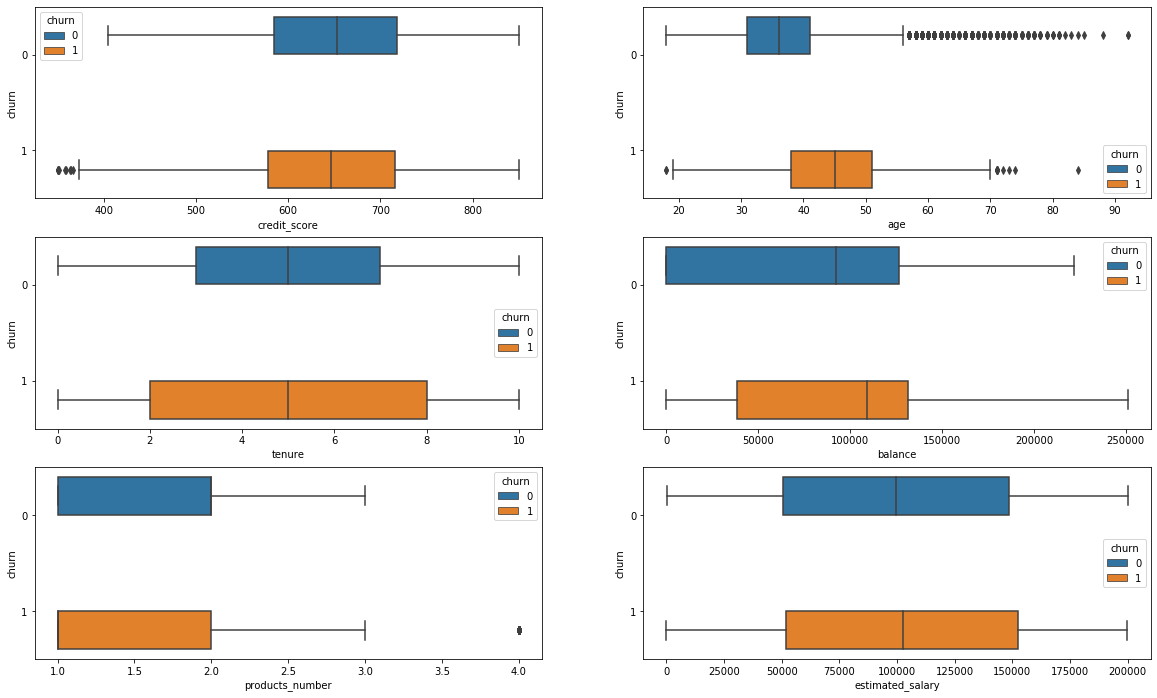

In [15]:
#boxplot to analysis the outlier
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
data = customerdf
sns.boxplot(x='credit_score', y= 'churn', hue = 'churn', data=data, orient ='h', ax=axarr[0][0])
sns.boxplot(x='age', y= 'churn', hue = 'churn', data=data, orient = 'h', ax=axarr[0][1])
sns.boxplot(x='tenure', y= 'churn', hue = 'churn', data=data, orient ='h', ax=axarr[1][0])
sns.boxplot(x='balance', y= 'churn', hue = 'churn', data=data, orient ='h', ax=axarr[1][1])
sns.boxplot(x='products_number', y= 'churn', hue = 'churn', data=data, orient ='h', ax=axarr[2][0])
sns.boxplot(x='estimated_salary', y= 'churn', hue = 'churn', data=data, orient ='h', ax=axarr[2][1])

1) some of customer left bank due to the lower credit_score
2) More older customers left bank than younger customers
3) There is one flag on: some customers with higher bank balances left the bank
4) We probably can seprate analysis over 70 customers whom left the bank

## Data Cleaning

In [16]:
#drop country column and customer_id
drop_list = ['customer_id','country']
customerdf = customerdf.drop(drop_list,axis = 1)

In [17]:
#change gender to binary value
def gender_binary (gender):
    """ To change gender data to binary type
     >>> input: -> ouput
     male -> 0
     female ->1
    """
    if gender == 'male':
        return 0
    else:
        return 1

In [18]:
customerdf['gender']= customerdf.apply(lambda x : gender_binary(gender = x['gender']), axis = 1)
customerdf

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


## Data Modeling

In [19]:
#Splitting data into testing and traing data
## set input and output dataset
data = customerdf.values
X, y = data[:,:-1],data[:,-1]

In [20]:
#split the dataset (80% train;20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [21]:
print(X_train.shape, y_train.shape)

(8000, 9) (8000,)


### Logistic Regression

In [22]:
#Logistic Regression
##Define model
model_name = "Logistic Regression"
logreg_model = LogisticRegression()

In [23]:
# Using GridSearch to find the best parameters

##l1 lasso l2 ridge
grid_value = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg_cv = GridSearchCV (logreg_model, grid_value, cv=10, scoring='accuracy', n_jobs=2)

##Fit model
logreg_cv.fit(X_train,y_train)

print("best parameters) ",logreg_cv.best_params_)
print(logreg_cv.best_estimator_) 

best parameters)  {'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01)


In [24]:
#best performance modelc
logreg_best = LogisticRegression(C=0.01)

In [25]:
#fit the model
logreg_best.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [26]:
## get predicted output on validation data
logreg_predictions= logreg_best.predict(X_test)

In [27]:
#Precision Score
print('Precision score :'," ", precision_score(y_test,logreg_predictions,average='binary').round(3))

Precision score :   0.373


In [28]:
#import classification_report
print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.97      0.88      1595
         1.0       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [29]:
#Actual vs Predicted
pd.crosstab(y_test, logreg_predictions, rownames=["True"], colnames = ["Predicted"])

Predicted,0.0,1.0
True,,
0.0,1553,42
1.0,380,25


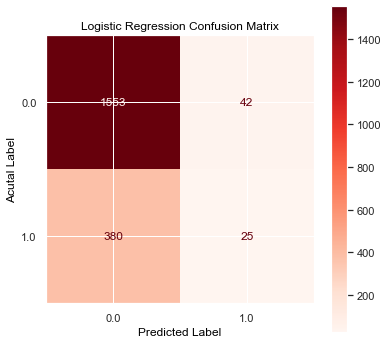

In [30]:
#Confusion Matrix
sns.set(rc={"figure.figsize":(6,6)})
matrix = plot_confusion_matrix(logreg_best, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Logistic Regression Confusion Matrix', color ='black')
plt.xlabel('Predicted Label',color = 'black')
plt.ylabel('Acutal Label',color = 'black')
plt.show()

### Decision Tree

In [31]:
#Decision Tree
##Define model
decisiontree_model = DecisionTreeClassifier(random_state=0)

# Using GridSearch to find the best parameters
grid_value = {"max_depth": [3,4,5,6,7],
              "min_samples_leaf": [2,4,6]}
decisiontreemodel_cv = GridSearchCV (decisiontree_model, grid_value, cv=10, scoring='accuracy', n_jobs=2)

##Fit model
decisiontreemodel_cv.fit(X_train, y_train)

print("best parameters) ",decisiontreemodel_cv.best_params_)
print(decisiontreemodel_cv.best_estimator_) 

best parameters)  {'max_depth': 5, 'min_samples_leaf': 2}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)


In [32]:
#best performance modelc
decisiontreemodel_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

In [33]:
##Fit model
decisiontreemodel_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

In [34]:
## get predicted output on validation data
decisiontree_predictions= decisiontreemodel_best.predict(X_test)

In [35]:
#Precision Score
print('Precision score :'," ", precision_score(y_test,decisiontree_predictions,average='binary').round(3))

Precision score :   0.733


In [36]:
#import classification_report
print(classification_report(y_test,decisiontree_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1595
         1.0       0.73      0.49      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [37]:
#Actual vs Predicted
pd.crosstab(y_test,decisiontree_predictions, rownames=["True"], colnames = ["Predicted"])

Predicted,0.0,1.0
True,,
0.0,1523,72
1.0,207,198


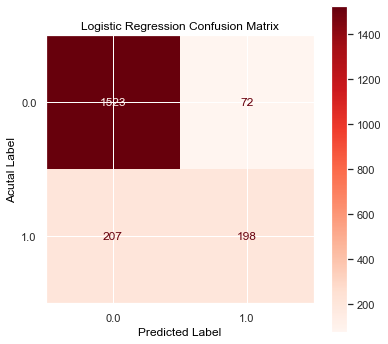

In [38]:
#Confusion Matrix
sns.set(rc={"figure.figsize":(6,6)})
matrix = plot_confusion_matrix(decisiontreemodel_best, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Logistic Regression Confusion Matrix', color ='black')
plt.xlabel('Predicted Label',color = 'black')
plt.ylabel('Acutal Label',color = 'black')
plt.show()

### Random Forest

In [39]:
#Random Forest
##Define model
rnd_clf_model = RandomForestClassifier(random_state=0)

In [40]:
# Using GridSearch to find the best parameters
grid_value = {
              "max_depth": [3,4,5,6,7],
              "min_samples_leaf": [2, 4, 6],
              "n_estimators" :[100]}

rnd_cv =  GridSearchCV (rnd_clf_model, grid_value, cv=10, scoring='accuracy', n_jobs=2)

##Fit model
rnd_cv.fit(X_train, y_train)

print("best parameters) ",rnd_cv.best_params_)
print(rnd_cv.best_estimator_)

best parameters)  {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=0)


In [41]:
#best performance model
rnd_best = RandomForestClassifier(max_depth = 7, min_samples_leaf =2, n_estimators=100, random_state=0)

In [42]:
#fit the model
rnd_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, random_state=0)

In [43]:
## get predicted output on validation data
randomforest_predictions= rnd_best.predict(X_test)

In [44]:
#Precision Score
print('Precision score :'," ", precision_score(y_test,randomforest_predictions,average='binary').round(3))

Precision score :   0.798


In [45]:
#import classification_report
print(classification_report(y_test,randomforest_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1595
         1.0       0.80      0.44      0.57       405

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



In [46]:
#Actual vs Predicted
pd.crosstab(y_test,randomforest_predictions, rownames=["True"], colnames = ["Predicted"])

Predicted,0.0,1.0
True,,
0.0,1550,45
1.0,227,178


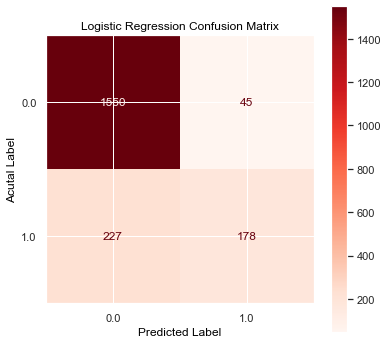

In [47]:
#Confusion Matrix
sns.set(rc={"figure.figsize":(6,6)})
matrix = plot_confusion_matrix(rnd_best, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Logistic Regression Confusion Matrix', color ='black')
plt.xlabel('Predicted Label',color = 'black')
plt.ylabel('Acutal Label',color = 'black')
plt.show()

### Boosted Tree

In [48]:
#Bossted Tree
##Define model
gbrt_model = GradientBoostingClassifier(random_state=0)

In [49]:
# Using GridSearch to find the best parameters
grid_value = {
              "max_depth": [3,4,5,6,7],
              "min_samples_leaf": [2, 4, 6],
              "n_estimators" :[100]}

gbrt_cv =  GridSearchCV (gbrt_model, grid_value, cv=10, scoring='accuracy', n_jobs=2)

##Fit model
gbrt_cv.fit(X_train, y_train)

print("best parameters) ", gbrt_cv.best_params_)
print(gbrt_cv.best_estimator_)

best parameters)  {'max_depth': 3, 'min_samples_leaf': 2, 'n_estimators': 100}
GradientBoostingClassifier(min_samples_leaf=2, random_state=0)


In [50]:
#best performance model
gbrt_best = GradientBoostingClassifier(max_depth=3, min_samples_leaf=2, n_estimators=100, random_state=0)

In [51]:
#fit the model
gbrt_best.fit(X_train,y_train)

GradientBoostingClassifier(min_samples_leaf=2, random_state=0)

In [52]:
## get predicted output on validation data
gbrt_predictions= gbrt_best.predict(X_test)

In [53]:
#Precision Score
print('Precision score :'," ", precision_score(y_test,gbrt_predictions,average='binary').round(3))

Precision score :   0.756


In [54]:
#import classification_report
print(classification_report(y_test,gbrt_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      1595
         1.0       0.76      0.47      0.58       405

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [55]:
#Actual vs Predicted
pd.crosstab(y_test,gbrt_predictions, rownames=["True"], colnames = ["Predicted"])

Predicted,0.0,1.0
True,,
0.0,1534,61
1.0,216,189


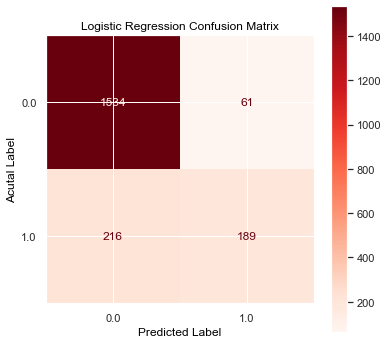

In [56]:
#Confusion Matrix
sns.set(rc={"figure.figsize":(6,6)})
matrix = plot_confusion_matrix(gbrt_best, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Logistic Regression Confusion Matrix', color ='black')
plt.xlabel('Predicted Label',color = 'black')
plt.ylabel('Acutal Label',color = 'black')
plt.show()

### KNN

In [57]:
##Define model
KNN = KNeighborsClassifier()

In [58]:
# Using GridSearch to find the best parameters
grid_value = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

KNN_cv =  GridSearchCV (KNN, grid_value, cv=10, scoring='accuracy', n_jobs=2)

##Fit model
KNN_cv.fit(X_train, y_train)

print("best parameters) ", KNN_cv.best_params_)
print(KNN_cv.best_estimator_)

best parameters)  {'n_neighbors': 8}
KNeighborsClassifier(n_neighbors=8)


In [59]:
#best performance model
KNN_best = KNeighborsClassifier(n_neighbors=8)

In [60]:
#fit the model
KNN_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [61]:
## get predicted output on validation data
KNN_predictions= KNN_best.predict(X_test)

In [62]:
#Precision Score
print('Precision score :'," ", precision_score(y_test,KNN_predictions,average='binary').round(3))

Precision score :   0.4


In [63]:
#import classification_report
print(classification_report(y_test,KNN_predictions))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88      1595
         1.0       0.40      0.03      0.06       405

    accuracy                           0.79      2000
   macro avg       0.60      0.51      0.47      2000
weighted avg       0.72      0.79      0.72      2000



In [64]:
#Actual vs Predicted
pd.crosstab(y_test,KNN_predictions, rownames=["True"], colnames = ["Predicted"])

Predicted,0.0,1.0
True,,
0.0,1574,21
1.0,391,14


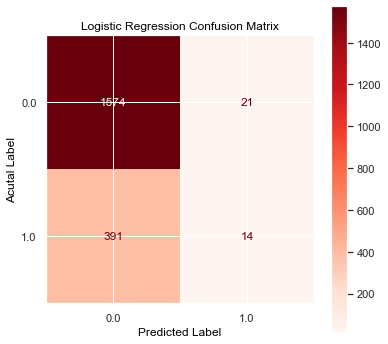

In [65]:
#Confusion Matrix
sns.set(rc={"figure.figsize":(6,6)})
matrix = plot_confusion_matrix(KNN_best, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Logistic Regression Confusion Matrix', color ='black')
plt.xlabel('Predicted Label',color = 'black')
plt.ylabel('Acutal Label',color = 'black')
plt.show()

### ROC-AUC Curve

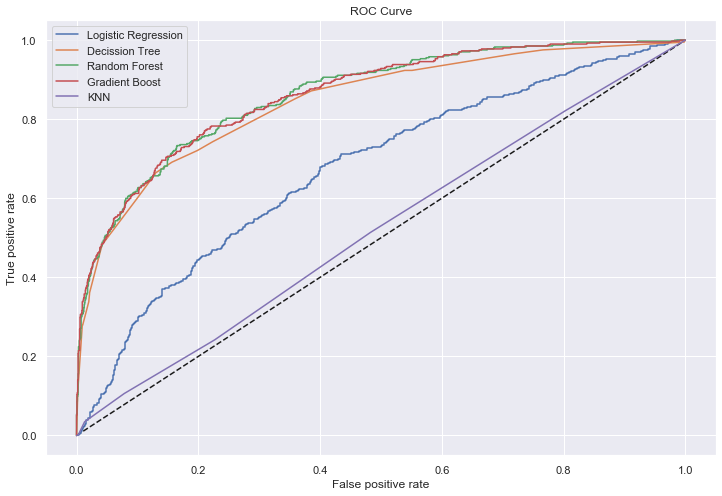

In [66]:
#ROC Curve plot
algos = [logreg_best, decisiontreemodel_best, rnd_best, gbrt_best, KNN_best]
labels = ['Logistic Regression', 'Decission Tree', 'Random Forest', 'Gradient Boost', 'KNN']

plt.figure(figsize = (12,8))
plt.plot([0,1], [0,1], 'k--')

for i in range(len(algos)):
    y_pred_prob = algos[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=labels[i])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')

In [67]:
algos = [decisiontreemodel_best, rnd_best, gbrt_best]

#decisiontreemodel
y_pred_prob_DT = algos[0].predict_proba(X_test)[:,1]   
roc_auc_score(y_test, y_pred_prob_DT)

0.8448082356128334

In [68]:
#randomforest
y_pred_prob_RF= algos[1].predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_RF)

0.8626951507411277

In [69]:
#Boost Tree
y_pred_prob_BT= algos[2].predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_BT)

0.8617361352993537